# Partielle DGL

In [1]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy.integrate

Als Beispiel für die Lösung einer partiellen Differentialgleichung wird die eindimensionale Wärmeleitgleichung für $\sf T = T(x,t)$ genutzt.

$$ \sf \partial_t T(x,t) = \partial_{xx}T(x,t) $$

In dieser Darstellung wurde die häufig Verwendete verkürzte Schreibweise für partielle Ableitungen verwendet

$$ \sf \partial_t = \frac{\partial}{\partial t} \quad \partial_{xx} = \frac{\partial^2}{\partial x^2} $$

Zur numerischen Lösung werden die beiden Ableitungen mit finiten Differenzen angenährt. Die zeitliche Ableitung wird mit der Vorwärtsdifferenzenformel zu

$$\sf \frac{T(x)^{n+1} - T(x)^n}{\Delta t} = \partial_{xx}T(x,t) $$

Die Ortsableitung wird mit der Differenzenformel für die zweite Ableitung angenährt. Dabei wird insgesamt wieder das explizite Euler-Verfahren verwendet, so dass die rechte Seite der Gleichung zum Zeitpunkt $\sf n$ ausgewertet wird. Damit ergibt sich für einen Stützpunkt $\sf i$ zur Zeit $\sf n$

$$\sf \frac{T^{n+1}_i - T^n_i}{\Delta t} = \frac{T^n_{i-1} - 2T^n_i + T^n_{i+1}}{\Delta x^2} $$

Und die Auflösung nach $\sf T^{n+1}_i$ führt zu

$$\sf T^{n+1}_i = T^n_i + \Delta t\frac{T^n_{i-1} - 2T^n_i + T^n_{i+1}}{\Delta x^2} $$

Da diese Formel am Rand, z.B. bei $\sf i=0$ nicht ausgewertet werden kann, muss an diesen Stellen für die Ortsableitungen eine nicht-zentrale Differenzenformel verwendet werden. In unserem Fall können diese beiden Formeln verwendet werden:

$$ \sf \partial_{xx} y(x_i) = \frac{y_i - 2y_{i+1} + y_{i+2}}{\Delta x^2} $$ 
$$ \sf \partial_{xx} y(x_i) = \frac{y_{i-2} - 2y_{i-1} + y_i}{\Delta x^2} $$

Damit sind alle Bestandteile eines einfachen expliziten Lösers für die obige Wärmeleitgleichung gegeben. Die Lösung soll auf dem Intervall $\sf [0, x_{ende}]\times[0, t_{ende}]$ erfolgen. 

Als Beispiel wird der Anfangswert für die Temperatur $\sf T(x, t=0) = 0$ angenommen und die Randbedinungen sind $\sf T(x=0, t) = 1$ und $\sf T(x=x_{ende},t) = 0$. Die örtliche Ausdehnung ist $\sf x_{ende}=10$ und die Berechnung soll bis zum Zeitpunkt $\sf t_{ende}=5000$ erfolgen, wobei 100 Stützstellen für $\sf x$ und 10000 für $\sf t$ verwendet werden sollen.

In [2]:
# Konstanten für das Beispiel
x_ende = 10
t_ende = 5000
nx = 100
nt = 10000
dx = x_ende / (nx-1)
dt = t_ende / (nt-1)

In [3]:
# Infos für die Visualisierung
x = np.linspace(0, x_ende, nx)
t = np.linspace(0, t_ende, nt)

In [4]:
# Array auf dem die Gesamtlösung gespeichert wird
T = np.zeros((nt, nx))

In [5]:
# Setzen der Anfangswerte
T[0] = np.zeros(nx)

# Hilfsarray
T_tmp = np.zeros(nx)

for it in range(1, nt-1):
    Tc = T[it]
    Tn = T[it+1]
    Tn[1:-1] = Tc[:-2] - 2*Tc[1:-1] + Tc[2:]

    Tn *= dt
    Tn += Tc
    Tn[0] = 1
    Tn[-1] = 0
    
#     d[it] = up
#     u = np.copy(up)

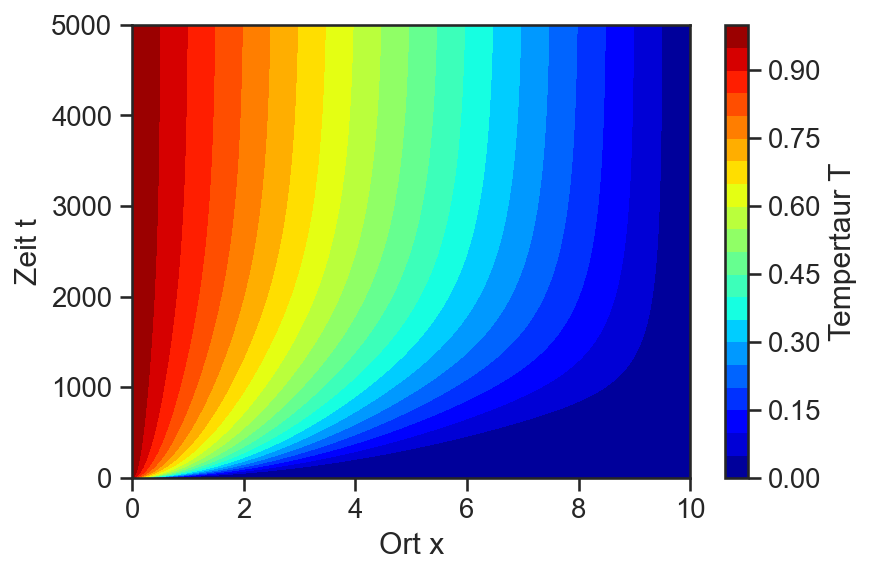

In [6]:
plt.contourf(T, levels=20, extent=[0, x_ende, 0, t_ende], cmap='jet')
plt.xlabel('Ort x')
plt.ylabel('Zeit t')
plt.colorbar(label='Tempertaur T');

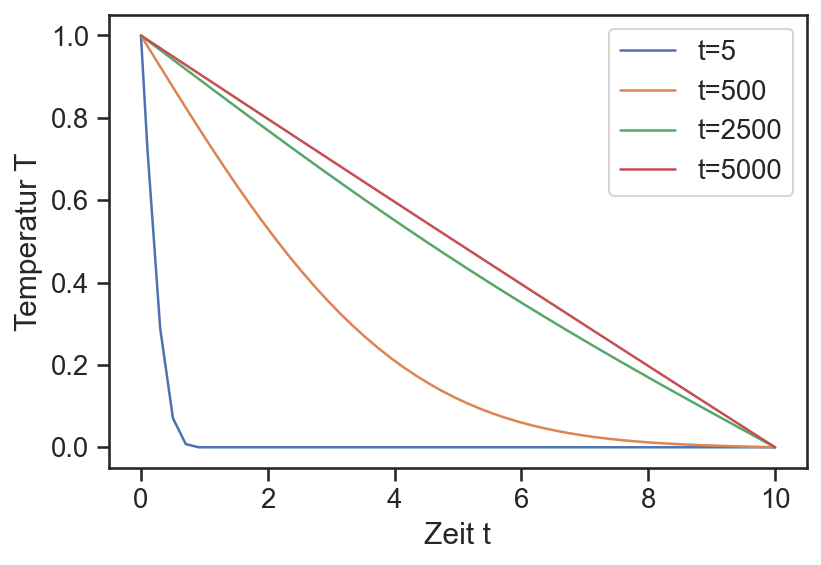

In [7]:
for i in [nt//1000, nt//10, nt//2, -1]:
    t_label = f't={t[i]:.0f}'
    plt.plot(x, T[i], label=t_label)

plt.legend()
plt.xlabel('Zeit t')
plt.ylabel('Temperatur T');

Text(0, 0.5, 'Temperatur T')

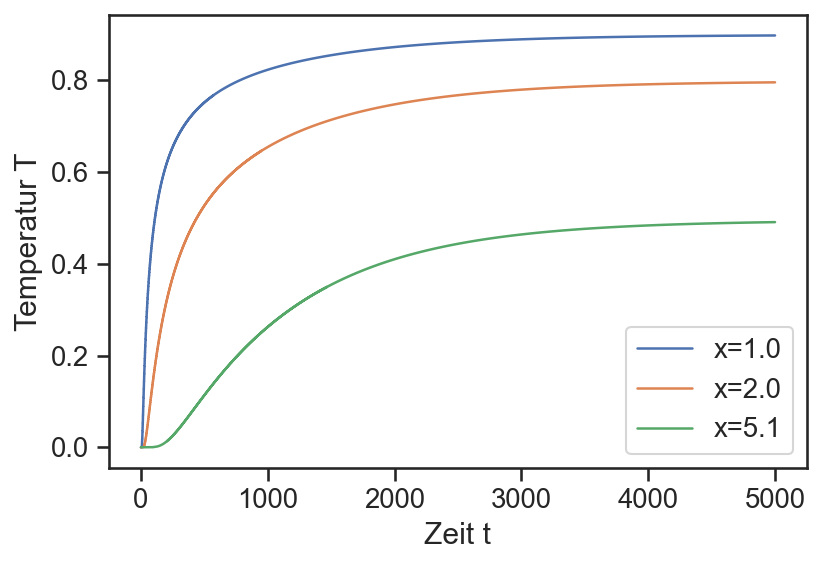

In [8]:
for i in [nx//10, nx//5, nx//2]:
    x_label = f'x={x[i]:.1f}'
    plt.plot(t, T[:,i], label=x_label)

plt.legend()
plt.xlabel('Zeit t')
plt.ylabel('Temperatur T')